In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahraahmadnezhad","key":"790d50c91678a265c82be42b422738b4"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d kaggle kernels output shroukali/credit-card-usage-clustering-kmeans-hierarical -p /path/to/dest

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: unrecognized arguments: output shroukali/credit-card-usage-clustering-kmeans-hierarical


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('credit-card-usage-clustering-kmeans-hierarical.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [7]:
!unzip \*.zip  && rm *.zip

Archive:  credit-card-usage-clustering-kmeans-hierarical.zip
  inflating: CC GENERAL.csv          


In [8]:
#Read Dataset
df = pd.read_csv('/content/files/CC GENERAL.csv')

In [9]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


 **Exploratory Data Analysis**

In [10]:
cat_columns = df.select_dtypes(include='object').columns
print('Categorical columns: \n', cat_columns)
print('-' * 30)
cont_columns = df.select_dtypes(exclude='object').columns
print('Continous columns: \n', cont_columns, '\n their count is ', len(cont_columns))

Categorical columns: 
 Index(['CUST_ID'], dtype='object')
------------------------------
Continous columns: 
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object') 
 their count is  17


In [11]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
#Check Nulls
df.isna().sum()*100/len(df)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [13]:
df.isna().sum()*100/len(df)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

**KNN Imputer**

In [14]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[cont_columns] = imputer.fit_transform(df[cont_columns])

In [15]:
df.isna().sum()*100/len(df)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

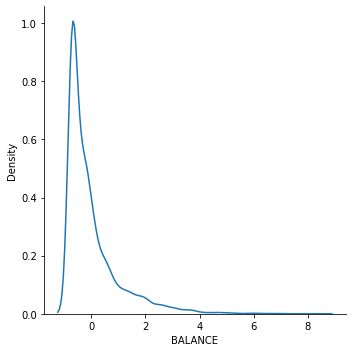

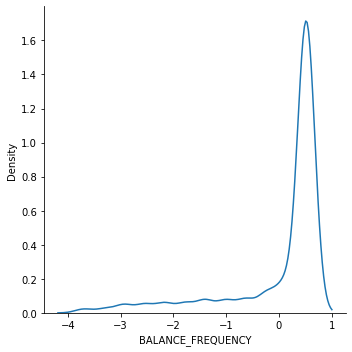

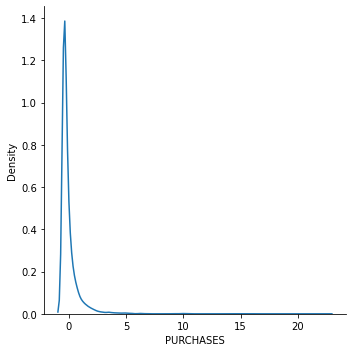

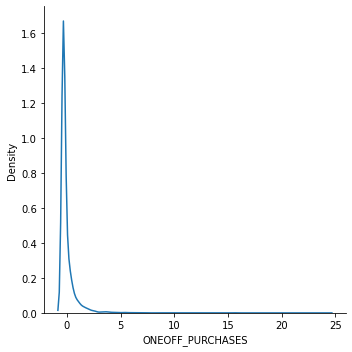

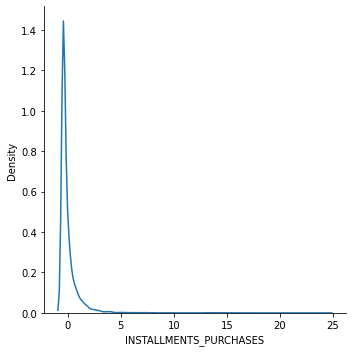

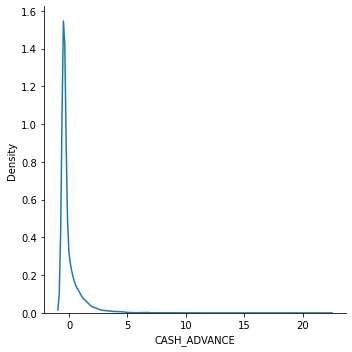

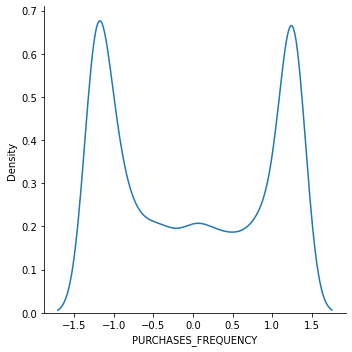

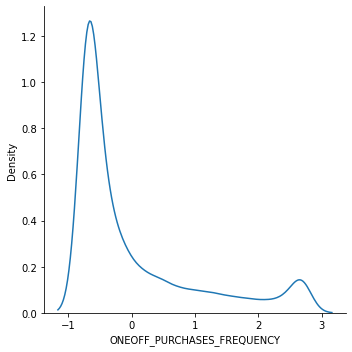

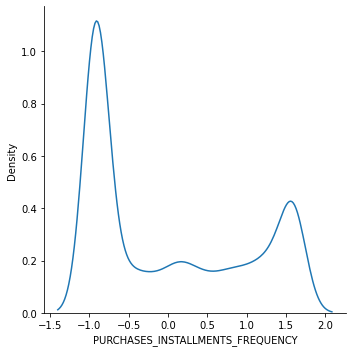

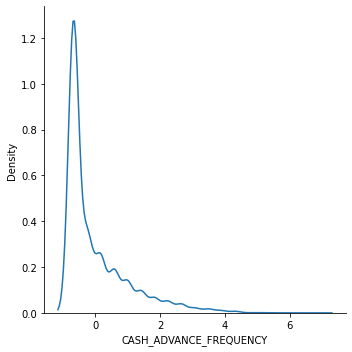

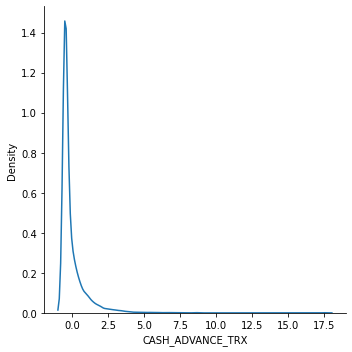

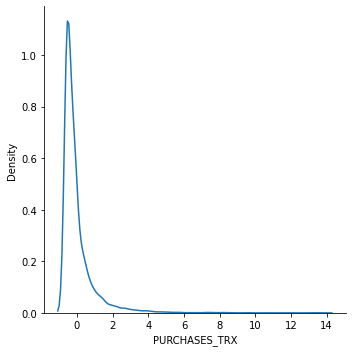

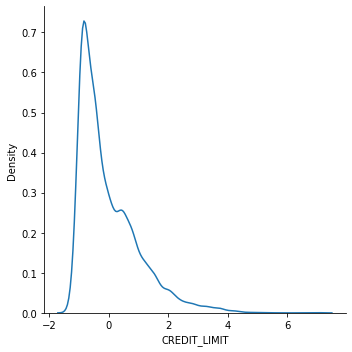

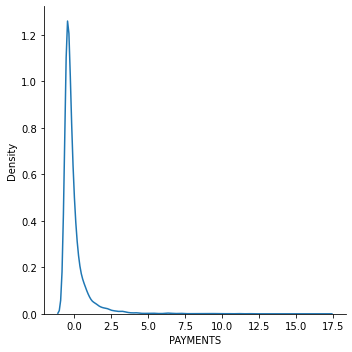

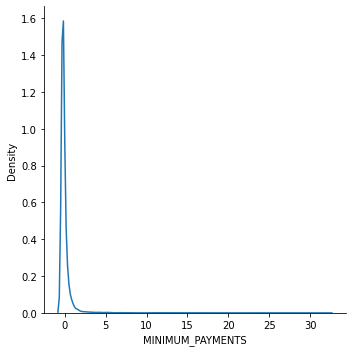

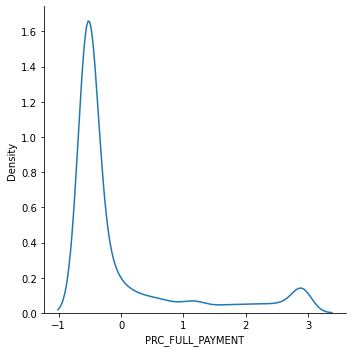

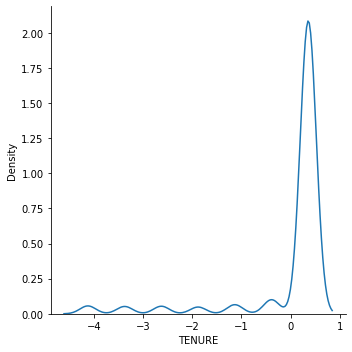

In [35]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

In [36]:
for col in cont_columns:
    df[col]= np.log(1 + df[col])

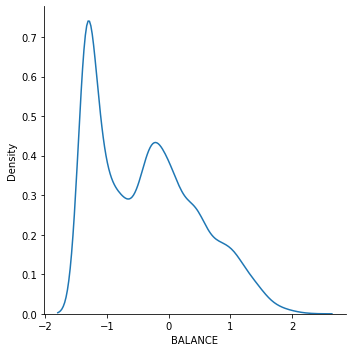

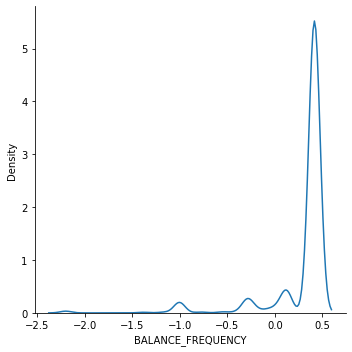

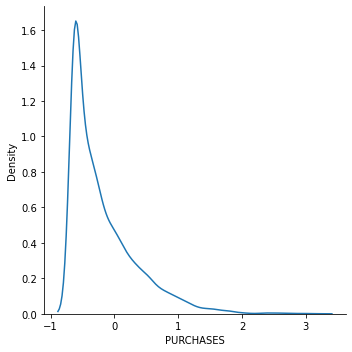

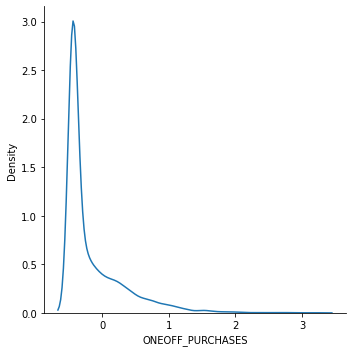

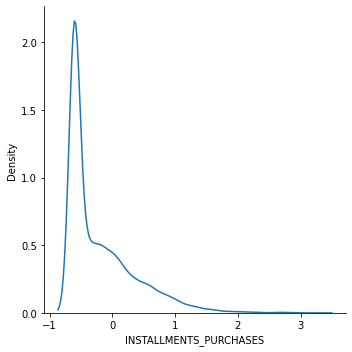

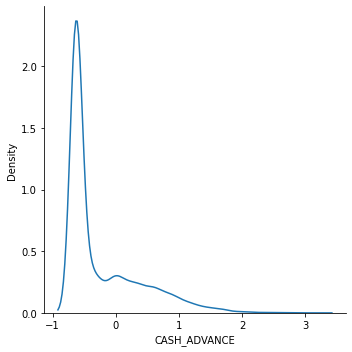

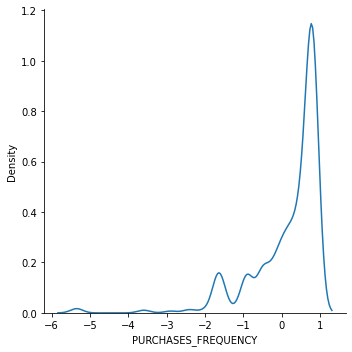

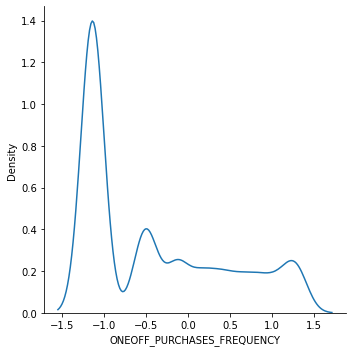

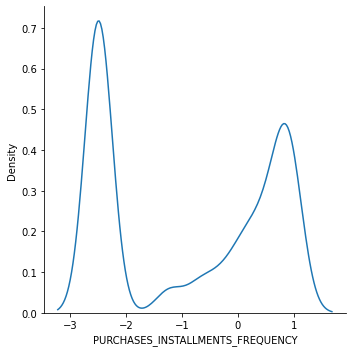

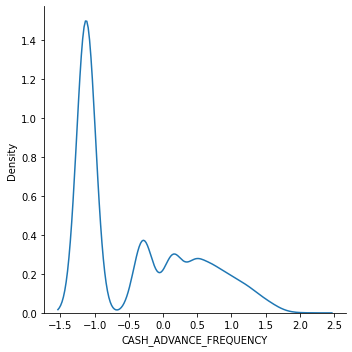

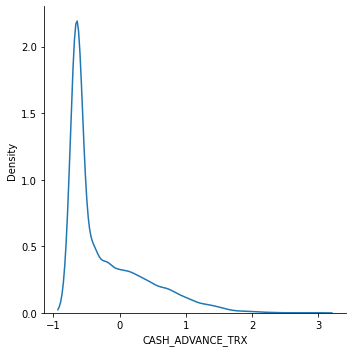

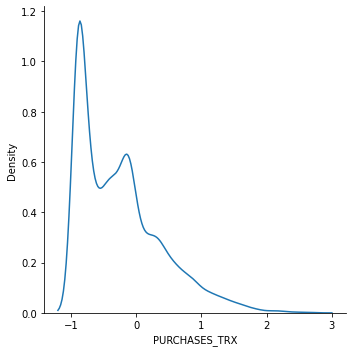

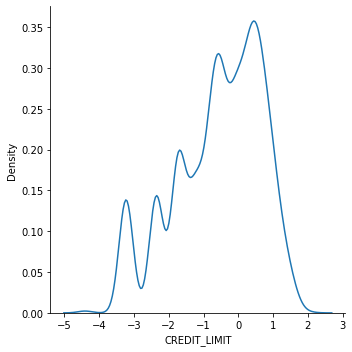

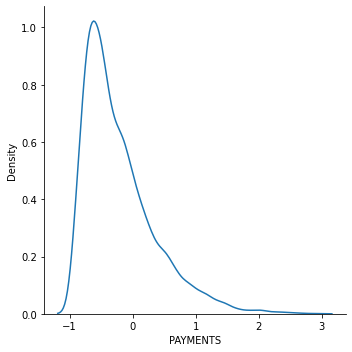

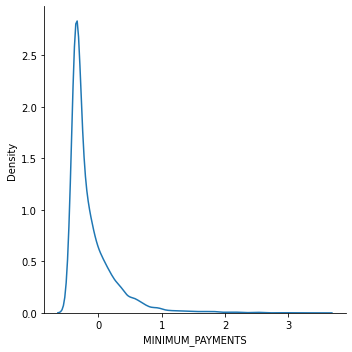

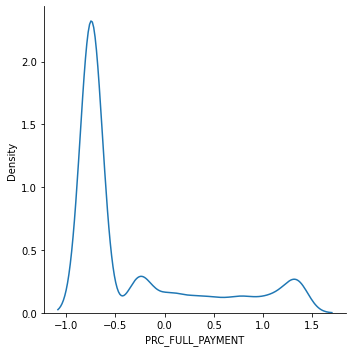

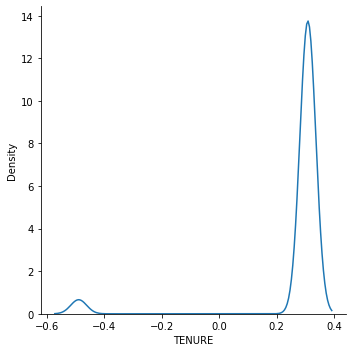

In [37]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[cont_columns] = scaler.fit_transform(df[cont_columns])

In [17]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960336,-0.528979,-0.303812,-0.525551,0.36068
1,C10002,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688696,0.818642,0.093556,0.234227,0.36068
2,C10003,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826116,-0.383805,-0.096029,-0.525551,0.36068
3,C10004,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826116,-0.598688,-0.201440,-0.525551,0.36068
4,C10005,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905368,-0.364368,-0.258964,-0.525551,0.36068


In [18]:
data = df[cont_columns]
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

**Machine Learning Models**

1) K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

clusters = 20
square_distance = []
for i in range(1,clusters):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(data)
    square_distance.append(KM_model.inertia_)
    
square_distance

[152149.9999999997,
 127784.60665710524,
 111968.71861173981,
 99059.22795717155,
 91491.21018472881,
 84818.88561550772,
 79502.34499822372,
 74459.54401921527,
 69895.01141423997,
 66496.1782561672,
 63655.94910684629,
 61411.454515518984,
 59207.60476170542,
 57524.72917406876,
 55894.11860893557,
 54674.74569714197,
 53060.03418188964,
 51787.54795092039,
 50679.17009698357]

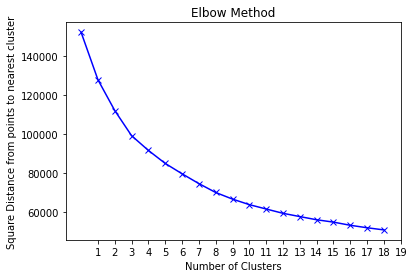

In [20]:
ax , fig = plt.subplots()
ax = plt.plot(square_distance , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Square Distance from points to nearest cluster")
plt.title("Elbow Method")
plt.show()

b) Silhouette Cofficient Method

In [21]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2,20):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(data)
    sil_scores.append(round(silhouette_score(data , KM_model.labels_),4))

print(sil_scores)

[0.2093, 0.2503, 0.1975, 0.193, 0.2025, 0.2081, 0.2185, 0.226, 0.2201, 0.219, 0.2162, 0.2211, 0.1952, 0.2228, 0.2012, 0.2065, 0.2051, 0.2025]


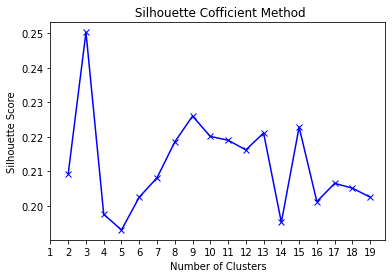

In [22]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

In [23]:
KM_model = KMeans(2, init='k-means++', n_init=15, max_iter=400)
KM_model.fit(data)

KMeans(max_iter=400, n_clusters=2, n_init=15)

In [24]:
clustered_data = pd.concat( [data,pd.DataFrame({'Cluster':KM_model.labels_})] , axis=1)
clustered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960336,-0.528979,-0.303812,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688696,0.818642,0.093556,0.234227,0.36068,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826116,-0.383805,-0.096029,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826116,-0.598688,-0.201440,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905368,-0.364368,-0.258964,-0.525551,0.36068,0


visualize clusters againt each of the features to get some meanings about the clusters

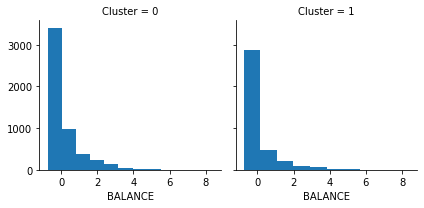

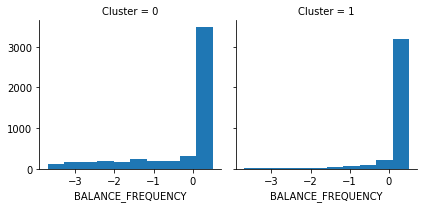

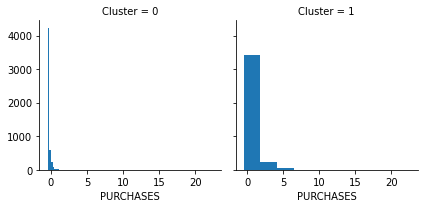

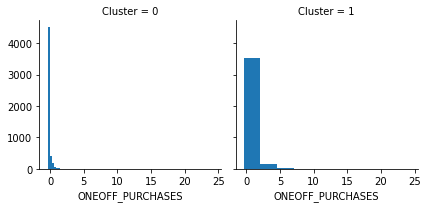

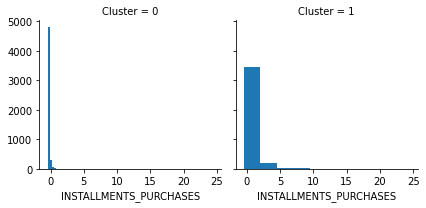

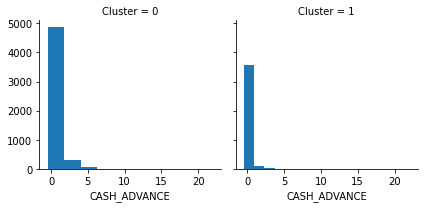

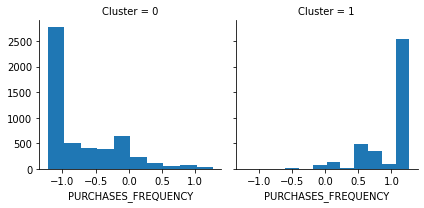

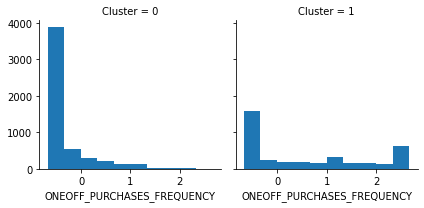

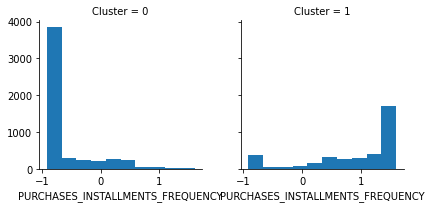

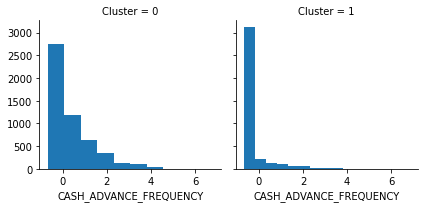

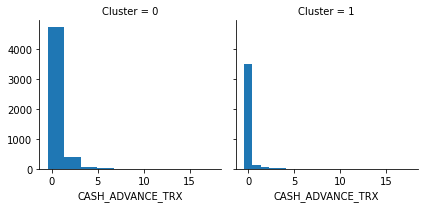

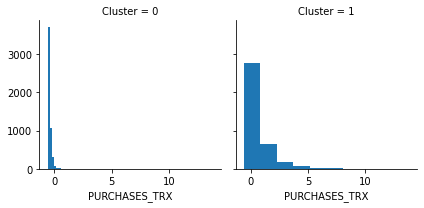

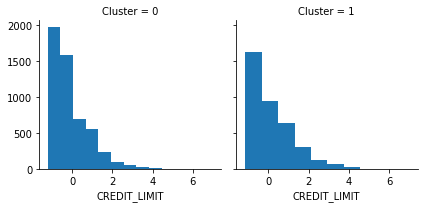

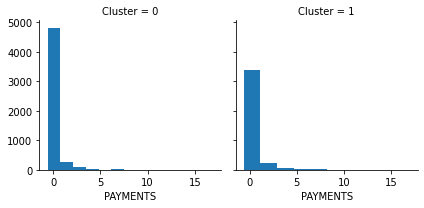

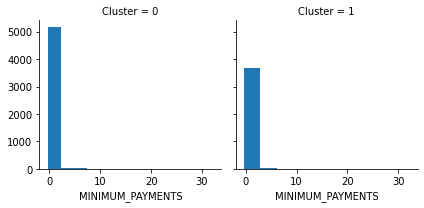

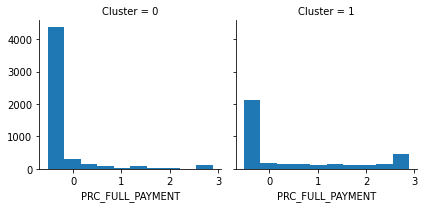

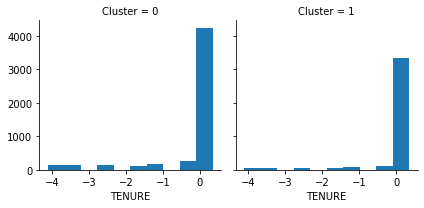

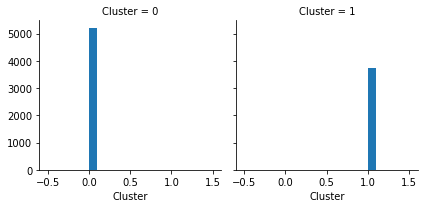

In [25]:
for c in clustered_data:
    grid = sns.FacetGrid(clustered_data, col='Cluster')
    grid.map(plt.hist, c)

In [ ]:
#Apply inverse transformation
for col in cont_columns:
    clustered_data[col] = np.exp(clustered_data[col])
clustered_data.head()

**Dimensionality Reduction (PCA)**

 I'll check the data correlation,as I gonna apply PCA on the data

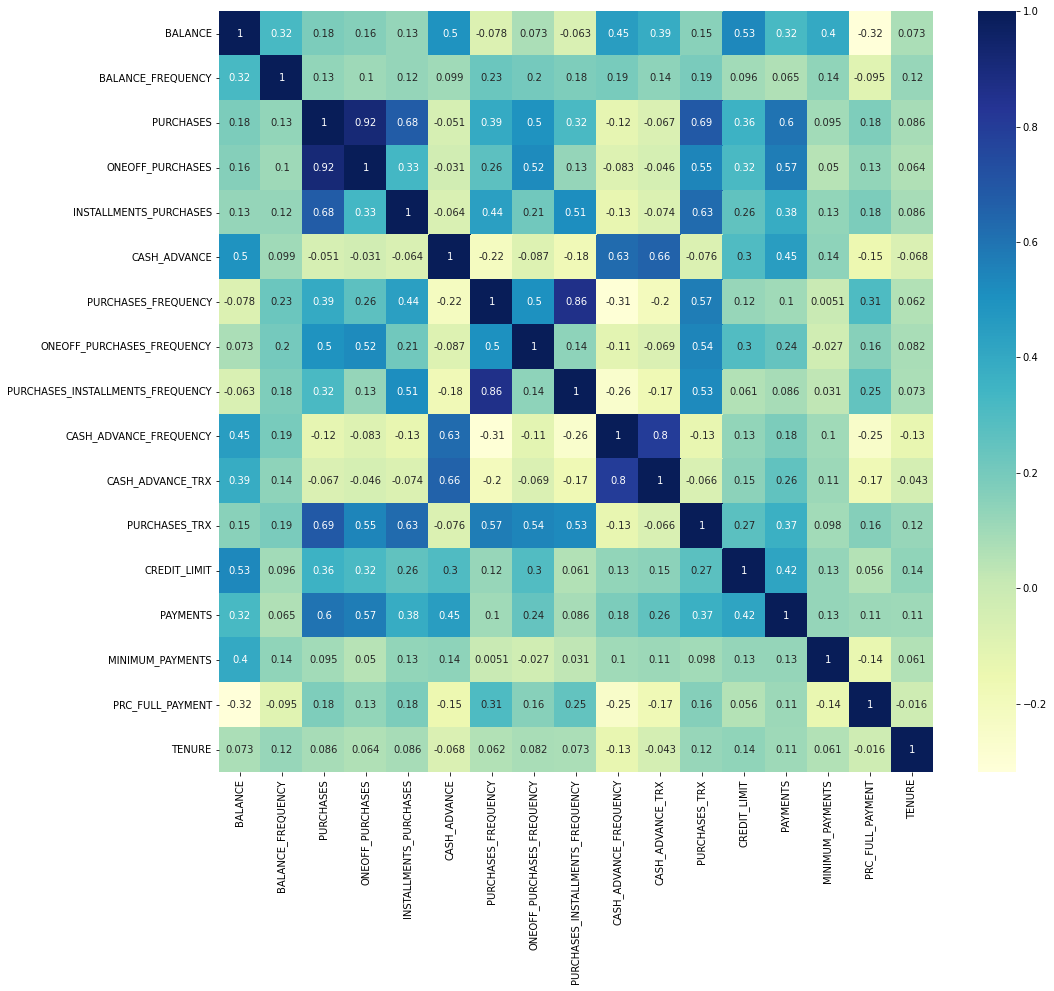

In [26]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [27]:
#Apply dimensionality reduction so we can visualize our clusters
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(clustered_data)
DR_clustered_data = pca.transform(clustered_data)
DR_clustered_data.shape

(8950, 2)

In [ ]:
#DR_clustered_data = pd.DataFrame(DR_clustered_data)
#DR_clustered_data.columns= ['Feature1','Feature2']
#DR_clustered_data.head()

**Visualize Clusters (k-Means)**

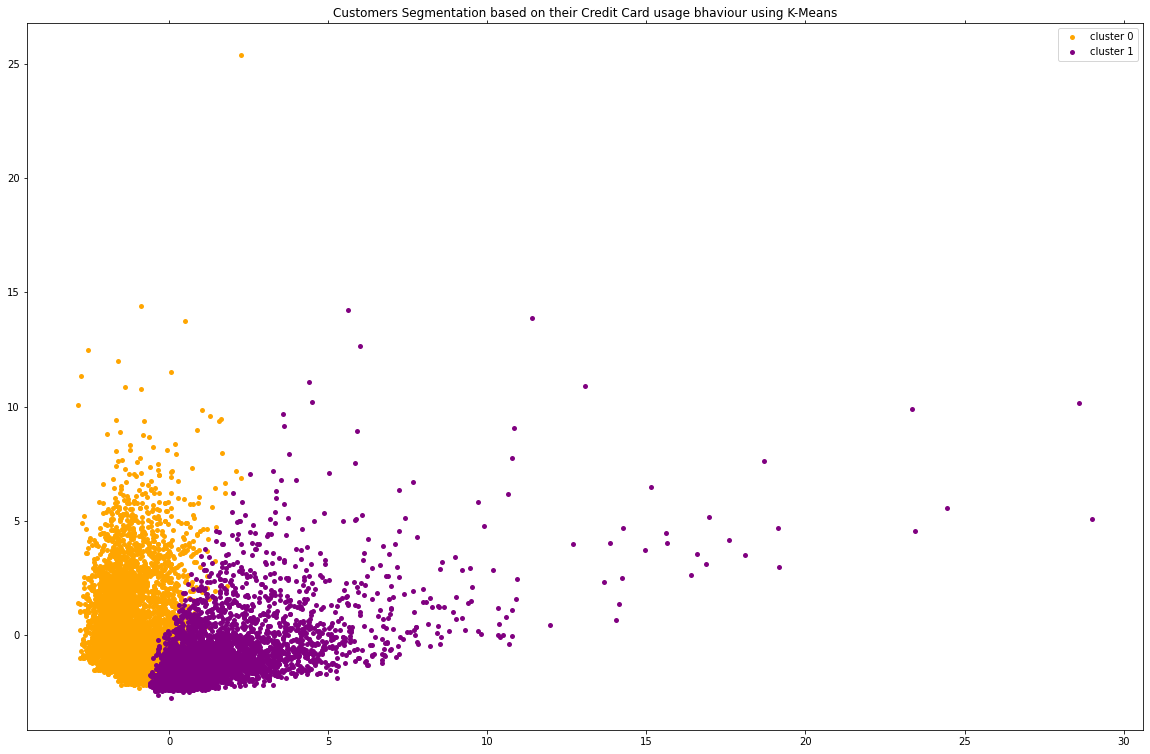

In [28]:
x, y = DR_clustered_data[:, 0], DR_clustered_data[:, 1]

colors = {0: 'orange',
          1: 'purple'}
       

names = {0: 'cluster 0', 
         1: 'cluster 1'}
   
  
df_vis = pd.DataFrame({'x': x, 'y':y, 'label':KM_model.labels_}) 
groups = df_vis.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour using K-Means")
plt.show()

In [29]:
pca = PCA(2)
pca.fit(data)
DR_data = pca.transform(data)
DR_data.shape
DR_data = pd.DataFrame(DR_data)
DR_data.columns= ['Feature1','Feature2']

**2) Hierarical Clustering (Aggloremative Clustering)**

visualize the dendogram of the bottom-up approach of hierarical clustering (Agg Clustering)

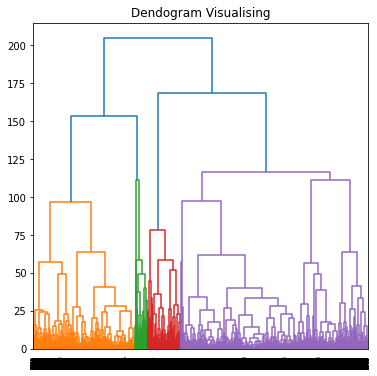

In [30]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(6, 6)) 
plt.title('Dendogram Visualising') 
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

In [31]:
#Reapply Silhouette score this time on Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

sil_scores = []
for i in range(2,20):
    HC_model = AgglomerativeClustering(n_clusters = i)
    HC_model.fit(data)
    sil_scores.append(round(silhouette_score(data , HC_model.labels_),4))

print(sil_scores)

[0.1852, 0.1924, 0.173, 0.1622, 0.1792, 0.182, 0.1842, 0.1858, 0.1877, 0.1942, 0.1741, 0.1093, 0.1105, 0.1148, 0.1161, 0.1184, 0.1267, 0.1304]


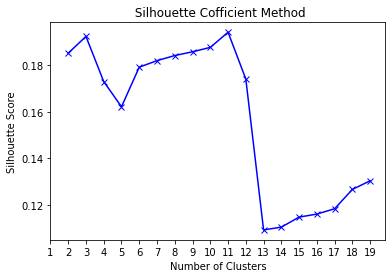

In [32]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

In [33]:
#Fit model and also on 2 clusters
HC_Model = AgglomerativeClustering(n_clusters = 2)
HC_Model.fit(data)

AgglomerativeClustering()

**Visualize Clusters (Agglomerative Clustering)**

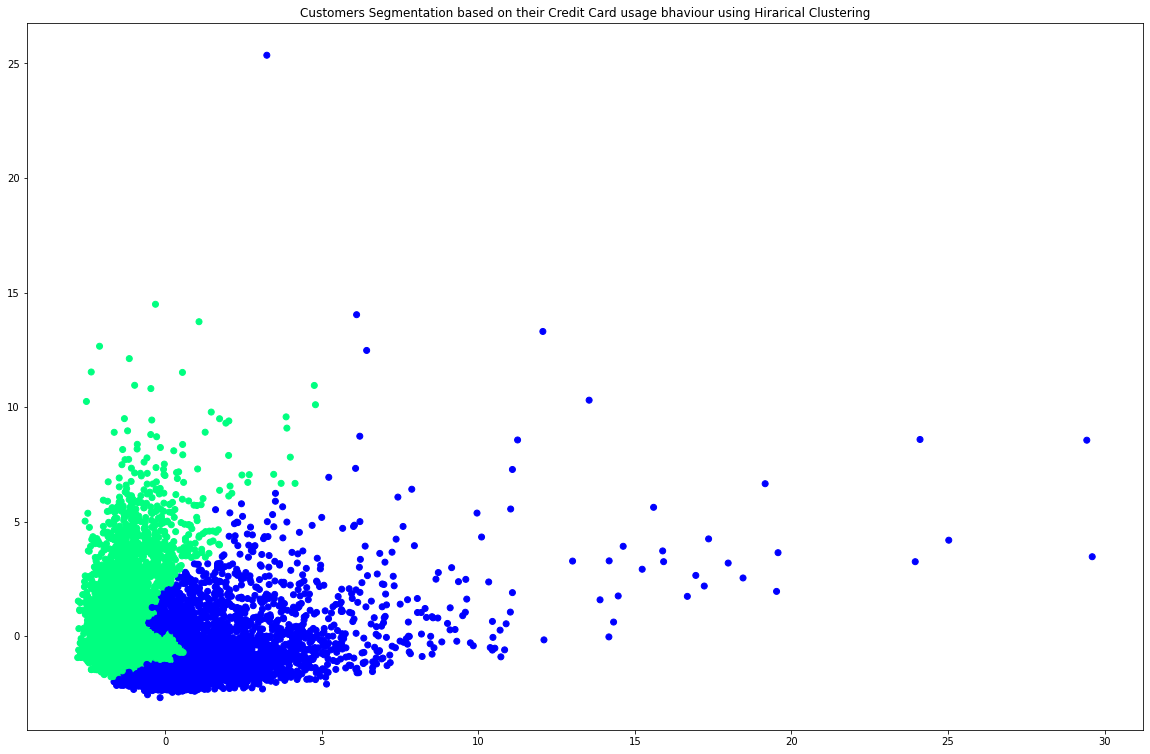

In [34]:
# Visualizing the clustering 
fig , ax = plt.subplots(figsize=(20, 13))
plt.scatter(DR_data['Feature1'], DR_data['Feature2'],  
           c = HC_Model.fit_predict(DR_data), cmap =plt.cm.winter) 
ax.set_title('Customers Segmentation based on their Credit Card usage bhaviour using Hirarical Clustering')

plt.show() 